# Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing Datasets

In [4]:
dataset = pd.read_csv('Crop Production data.csv')
dataset.sample(5)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
103365,Madhya Pradesh,BALAGHAT,2006,Kharif,Other Kharif pulses,627.0,182.0
97801,Karnataka,YADGIR,2010,Rabi,Linseed,23.0,8.0
173555,Rajasthan,KOTA,2009,Kharif,Maize,11699.0,15560.0
207597,Uttar Pradesh,CHITRAKOOT,2012,Kharif,Moong(Green Gram),1261.0,541.0
147607,Odisha,BALANGIR,2006,Autumn,Urad,5003.0,1025.6


# Taking care of missing data

In [5]:
dataset.isnull().sum()

,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,3730


In [6]:
# Calculate the average production for each year
avg_production_by_year = dataset.groupby('Crop_Year')['Production'].mean()

# Fill missing production values with the average for that year
dataset['Production'] = dataset.apply(lambda row: avg_production_by_year[row['Crop_Year']] if pd.isna(row['Production']) else row['Production'], axis=1)


In [7]:
dataset.isnull().sum()

,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,0


# Generate Key Insights

In [8]:
# States Count with production
states_Count = dataset['State_Name'].value_counts()
print(states_Count)

State_Name
Uttar Pradesh                  33306
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18885
Assam                          14628
Odisha                         13575
Tamil Nadu                     13547
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9628
West Bengal                     9613
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4896
Kerala                          4261
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       1266
Mizoram                    

In [9]:
# District count according production
District_Count = dataset['District_Name'].value_counts()
print(District_Count)

District_Name
BIJAPUR      945
TUMKUR       936
BELGAUM      925
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
KHUNTI         6
RAMGARH        6
NAMSAI         1
MUMBAI         1
Name: count, Length: 646, dtype: int64


In [10]:
# Top 10 crops produced in India
top_10_crops = dataset['Crop'].value_counts().head(10)
print(top_10_crops)

Crop
Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
Groundnut             8834
Sugarcane             7921
Wheat                 7899
Rapeseed &Mustard     7592
Arhar/Tur             7578
Name: count, dtype: int64


In [11]:
# Average production of each crop
avg_production_by_crop = dataset.groupby('Crop')['Production'].mean().sort_values(ascending=False)
print(avg_production_by_crop)

Crop
Coconut            6.549251e+07
Sugarcane          7.065400e+05
Pump Kin           3.580575e+05
Total foodgrain    2.301636e+05
Wheat              1.706612e+05
                       ...     
Other Dry Fruit    0.000000e+00
Ribed Guard        0.000000e+00
Plums              0.000000e+00
Peach              0.000000e+00
Apple              0.000000e+00
Name: Production, Length: 124, dtype: float64


In [12]:
# Season wise production
season_wise_production = dataset.groupby('Season')['Production'].sum().sort_values(ascending=False)
print(season_wise_production)

Season
Whole Year     1.351442e+11
Kharif         5.055858e+09
Rabi           2.559165e+09
Winter         4.389378e+08
Summer         1.887393e+08
Autumn         7.385708e+07
Name: Production, dtype: float64


# Data Visualization


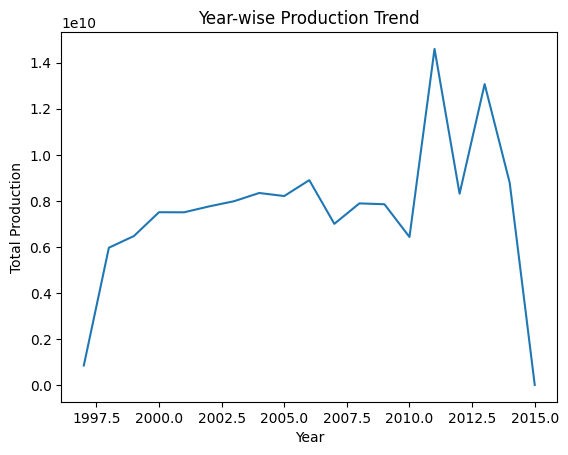

In [13]:
# Year wise production trend
year_wise_production = dataset.groupby('Crop_Year')['Production'].sum()
plt.plot(year_wise_production.index, year_wise_production.values)
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.title('Year-wise Production Trend')
plt.show()


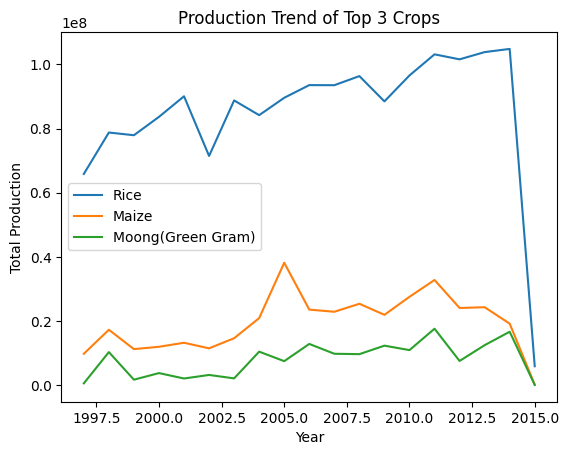

In [15]:
# Production trend of top 3 crops
top_3_crops = dataset['Crop'].value_counts().head(3).index.tolist()
for crop in top_3_crops:
  crop_data = dataset[dataset['Crop'] == crop]
  year_wise_production = crop_data.groupby('Crop_Year')['Production'].sum()
  plt.plot(year_wise_production.index, year_wise_production.values, label=crop)

plt.xlabel('Year')
plt.ylabel('Total Production')
plt.title('Production Trend of Top 3 Crops')
plt.legend()
plt.show()

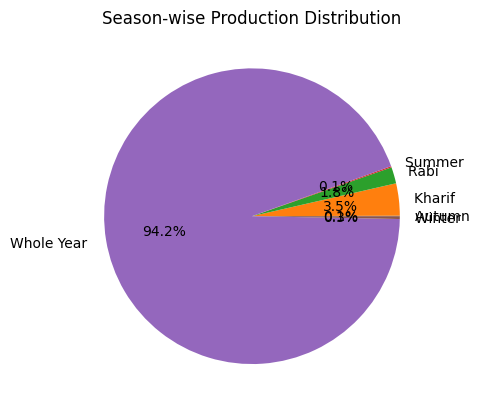

In [16]:
# Season-wise production distribution
season_wise_production = dataset.groupby('Season')['Production'].sum()
plt.pie(season_wise_production.values, labels=season_wise_production.index, autopct='%1.1f%%')
plt.title('Season-wise Production Distribution')
plt.show()

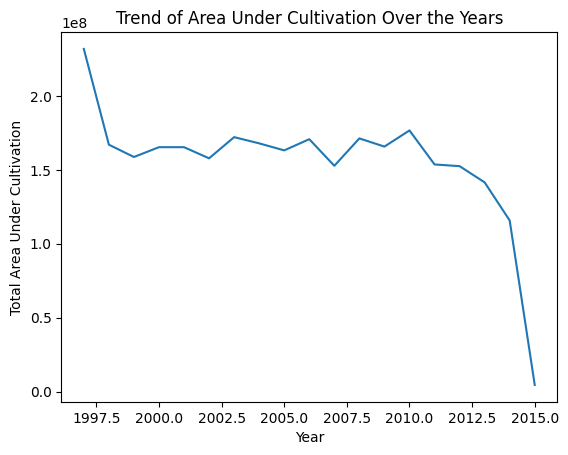

In [17]:
# Trend of area under cultivation over the years
area_trend = dataset.groupby('Crop_Year')['Area'].sum()
plt.plot(area_trend.index, area_trend.values)
plt.xlabel('Year')
plt.ylabel('Total Area Under Cultivation')
plt.title('Trend of Area Under Cultivation Over the Years')
plt.show()

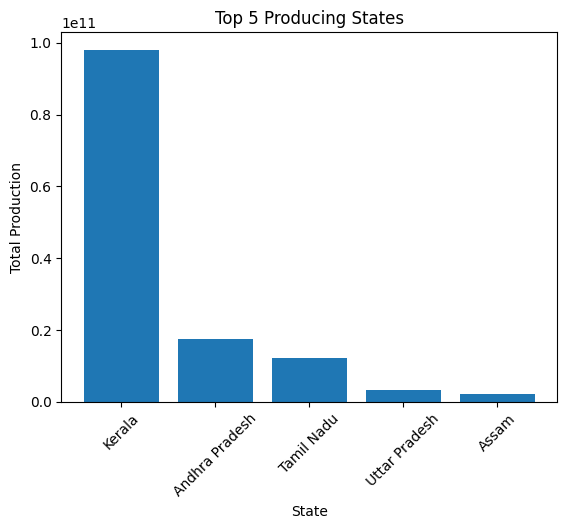

In [14]:
# Top 5 producing states
top_5_states = dataset.groupby('State_Name')['Production'].sum().sort_values(ascending=False).head(5)

plt.bar(top_5_states.index, top_5_states.values)
plt.xlabel('State')
plt.ylabel('Total Production')
plt.title('Top 5 Producing States')
plt.xticks(rotation=45)
plt.show()



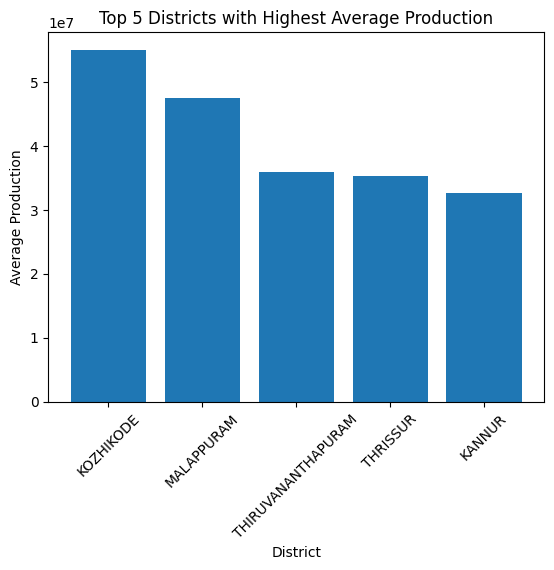

In [18]:
# Top 5 districts with highest average production
top_5_districts = dataset.groupby('District_Name')['Production'].mean().sort_values(ascending=False).head(5)
plt.bar(top_5_districts.index, top_5_districts.values)
plt.xlabel('District')
plt.ylabel('Average Production')
plt.title('Top 5 Districts with Highest Average Production')
plt.xticks(rotation=45)
plt.show()